# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 4: Molecular Dynamics - 1D motion
## 03.19.2019

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import sys
from scipy import stats
from datetime import datetime
import time
import imageio
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [8]:
sns.set_style(style='whitegrid')

In [9]:
def mode_choose(mode,n, N, rho, T):
    
    current_mode = (mode + ' ' +
                    str(n) + ' ' +
                    str(N) + ' ' +
                    str(rho) + ' ' +
                    str(T)
                   )

    return(current_mode)

In [10]:
# Number of simulated steps
n = 1000

steps = 1

In [11]:
os.system('..\Release\md1.exe ' + str(n))
data_set_1 = np.genfromtxt('md1.dat')

current_mode = mode_choose(mode='..\Release\md2.exe', n=n, N=64, rho=0.95, T=1.0)
os.system(current_mode)
data_set_2 = np.genfromtxt('md2.dat')

current_mode = mode_choose(mode='..\Release\md3.exe', n=n, N=864, rho=1.2, T=1.0)
os.system(current_mode)
data_set_3 = np.genfromtxt('md3.dat')

## Plot initial out data

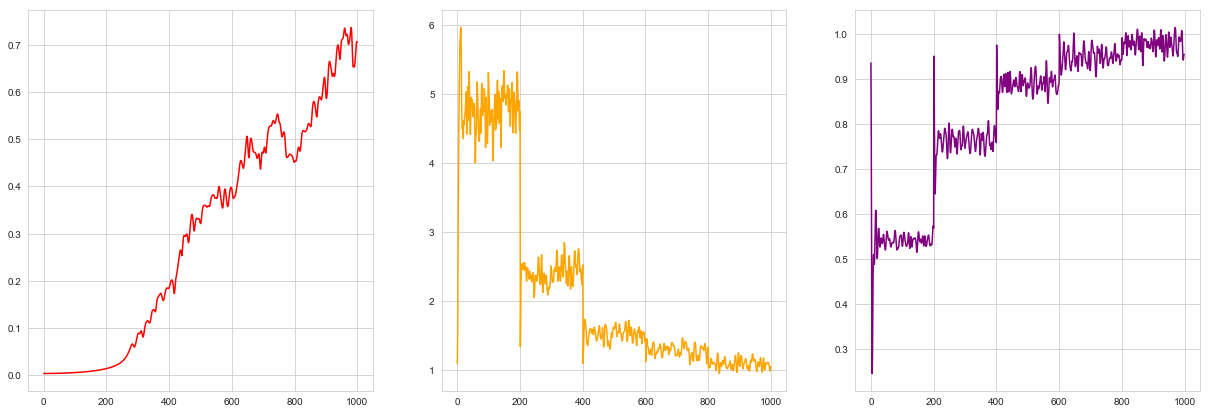

In [17]:
nrows=1
ncols=3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*7,nrows*7))

axes[0].plot(data_set_1[::steps,-1], color='red')
axes[1].plot(data_set_2[::steps,-1], color='orange')
axes[2].plot(data_set_3[::steps,-1], color='purple')

plt.show()

## Plot coordinates, velocities and accelerations

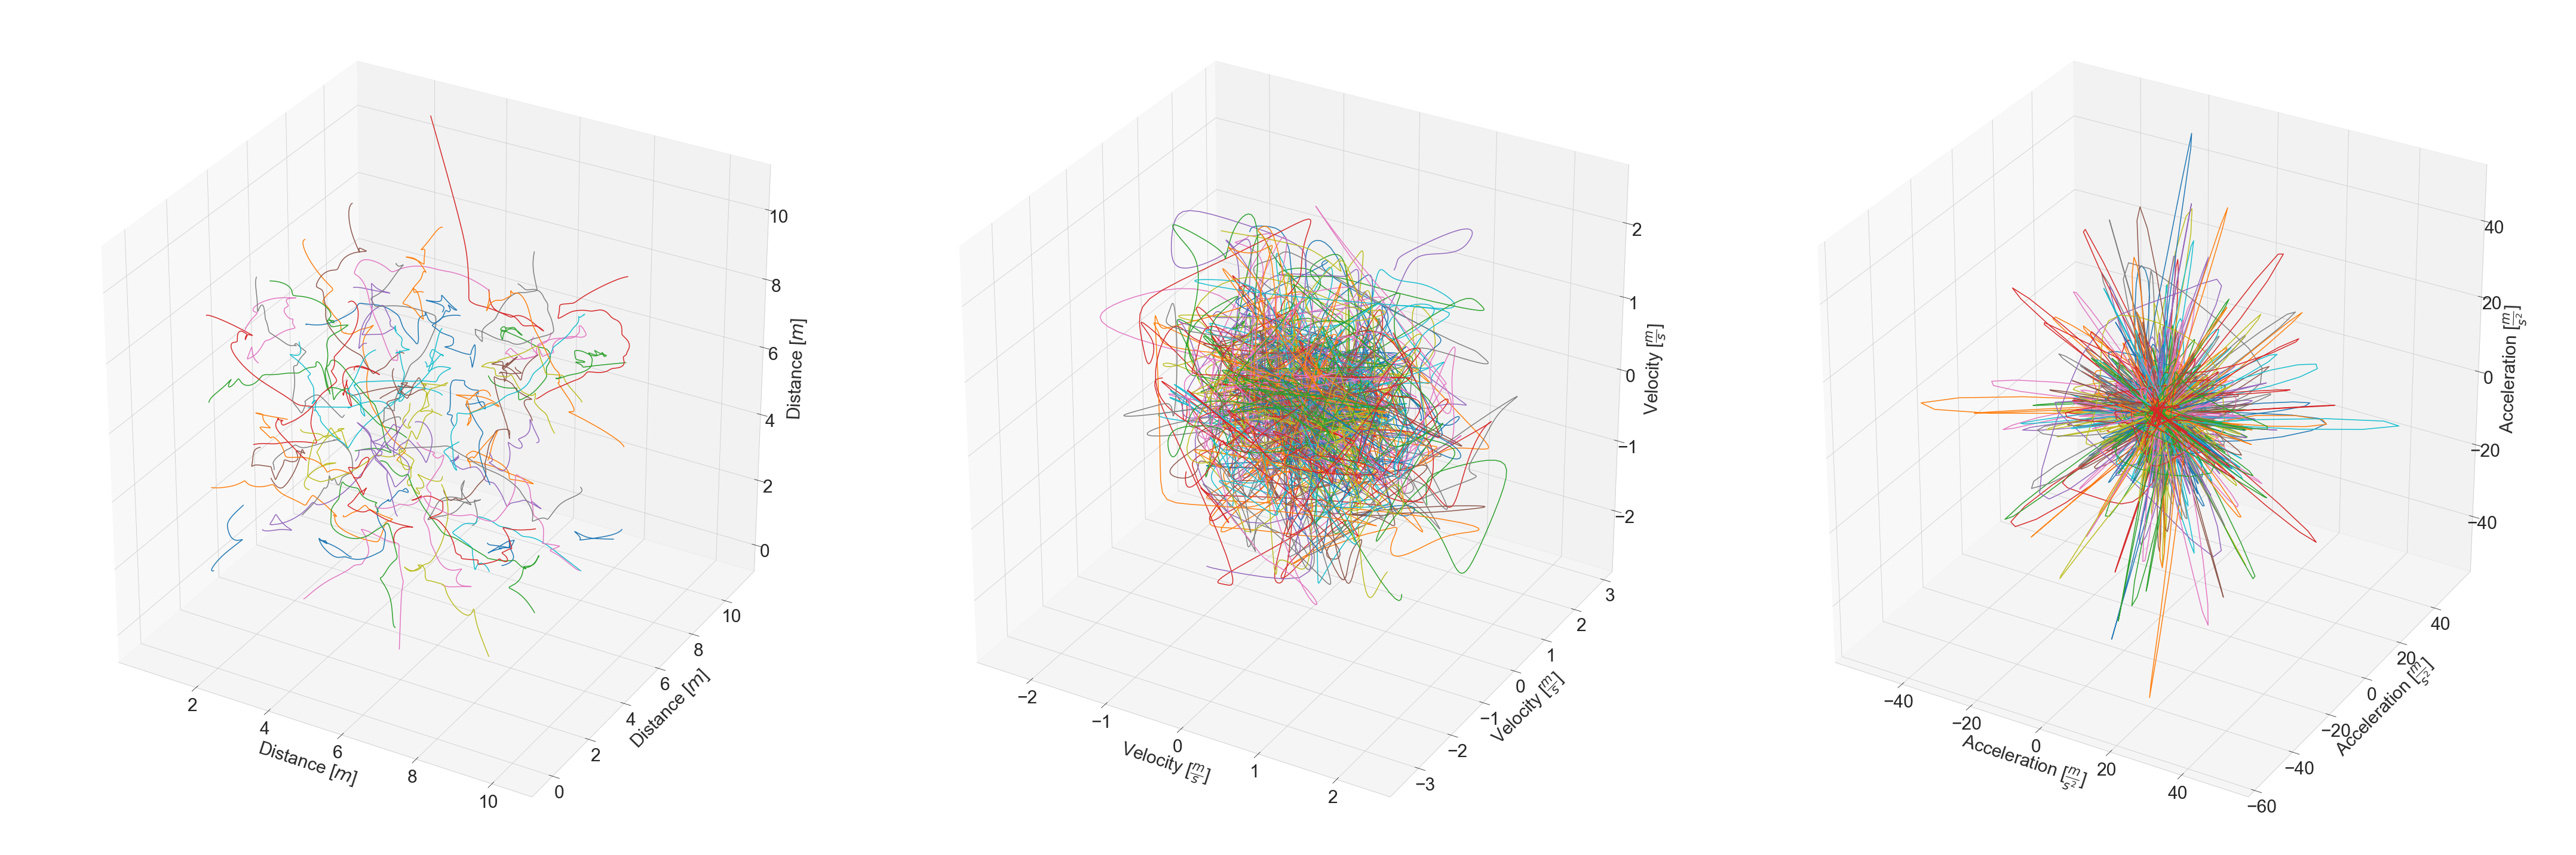

In [47]:
nrows=1
ncols=3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*20), subplot_kw={'projection': '3d'})

axislabelsize = 30
labelpad = 20

axes[0].set_xlabel('Distance [$m$]', fontsize=axislabelsize, labelpad=labelpad)
axes[0].set_ylabel('Distance [$m$]', fontsize=axislabelsize, labelpad=labelpad)
axes[0].set_zlabel('Distance [$m$]', fontsize=axislabelsize, labelpad=labelpad)

axes[1].set_xlabel('Velocity [$\\frac{m}{s}$]', fontsize=axislabelsize, labelpad=labelpad)
axes[1].set_ylabel('Velocity [$\\frac{m}{s}$]', fontsize=axislabelsize, labelpad=labelpad)
axes[1].set_zlabel('Velocity [$\\frac{m}{s}$]', fontsize=axislabelsize, labelpad=labelpad)

axes[2].set_xlabel('Acceleration [$\\frac{m}{s^{2}}$]', fontsize=axislabelsize, labelpad=labelpad)
axes[2].set_ylabel('Acceleration [$\\frac{m}{s^{2}}$]', fontsize=axislabelsize, labelpad=labelpad)
axes[2].set_zlabel('Acceleration [$\\frac{m}{s^{2}}$]', fontsize=axislabelsize, labelpad=labelpad)

axes[0].tick_params(axis='both', which='major', labelsize=axislabelsize)
axes[1].tick_params(axis='both', which='major', labelsize=axislabelsize)
axes[2].tick_params(axis='both', which='major', labelsize=axislabelsize)


for i in range(0, (data_set_1.shape[1]-1)//9):
    axes[0].plot(data_set_1[::steps,i*9], data_set_1[::steps,i*9+1], data_set_1[::steps,i*9+2])
    axes[1].plot(data_set_1[::steps,i*9+3], data_set_1[::steps,i*9+4], data_set_1[::steps,i*9+5])
    axes[2].plot(data_set_1[::steps,i*9+6], data_set_1[::steps,i*9+7], data_set_1[::steps,i*9+8])

fig.tight_layout()
plt.show()